## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = study_results.merge(mouse_metadata, on="Mouse ID")
# Display the data table for preview
merge_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice.
len(merge_df.value_counts("Mouse ID"))

249

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df.duplicated(["Mouse ID", "Timepoint"]).value_counts()

False    1888
dtype: int64

In [19]:
# Checking the number of mice in the clean DataFrame.
len(clean_df.value_counts("Mouse ID"))

249

In [94]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
mean.name = "Mean Tumor"
median = clean_df.groupby(["Mouse ID"]).median()["Tumor Volume (mm3)"]
median.name = "Median Tumor"
variance = clean_df.groupby(["Mouse ID"]).var()["Tumor Volume (mm3)"]
variance.name = "Variance Tumor"
std = clean_df.groupby(["Mouse ID"]).std()["Tumor Volume (mm3)"]
std.name = "Std Tumor"
sem = clean_df.groupby(["Mouse ID"]).sem()["Tumor Volume (mm3)"]
sem.name = "SEM Tumor"
sum_def = pd.concat([mean, median, variance, std, sem], axis=1)
#mean.to_frame(name="Mean Tumor").concat([median, variance, std, sem], axis=1)
sum_def

,Mean Tumor,Median Tumor,Variance Tumor,Std Tumor,SEM Tumor
Mouse ID,,,,,
a203,56.312708,55.983272,50.407041,7.099792,2.245151
a251,55.237095,55.938620,51.740730,7.193103,2.274659
a262,58.611631,58.572588,84.759928,9.206515,2.911356
a275,52.770965,52.044750,36.322924,6.026850,1.905857
a366,54.639906,55.265582,38.415384,6.198015,2.342629
...,...,...,...,...,...
z435,46.942214,47.115980,3.464898,1.861424,1.074693
z578,38.411510,38.160380,17.969628,4.239060,1.340508
z581,53.979584,53.062175,29.827123,5.461421,1.727053


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Mouse ID")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Mouse ID,,,,,
a203,56.312708,55.983272,50.407041,7.099792,2.245151
a251,55.237095,55.938620,51.740730,7.193103,2.274659
a262,58.611631,58.572588,84.759928,9.206515,2.911356
a275,52.770965,52.044750,36.322924,6.026850,1.905857
a366,54.639906,55.265582,38.415384,6.198015,2.342629
...,...,...,...,...,...
z435,46.942214,47.115980,3.464898,1.861424,1.074693
z578,38.411510,38.160380,17.969628,4.239060,1.340508
z581,53.979584,53.062175,29.827123,5.461421,1.727053


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

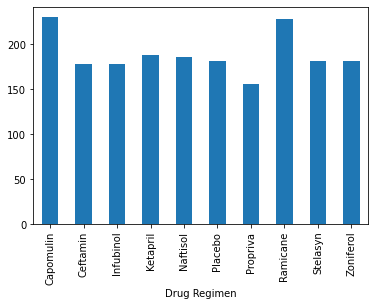

In [84]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_df.groupby("Drug Regimen").count()["Timepoint"]
timepoints.plot.bar()

<BarContainer object of 10 artists>

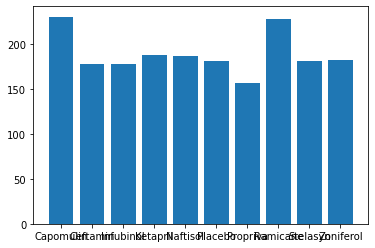

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(timepoints.index,timepoints)

<AxesSubplot:ylabel='Mouse ID'>

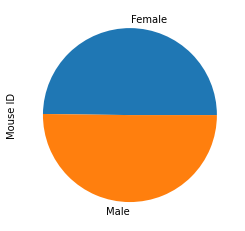

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders = clean_df.drop_duplicates("Mouse ID").groupby("Sex").count()["Mouse ID"]
genders.plot.pie()

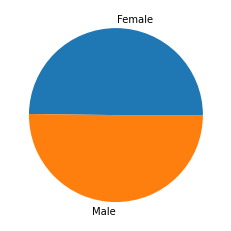

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(genders, labels=genders.index)
plt.show()

## Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastpoint = clean_df.groupby("Mouse ID").max()["Timepoint"]
lastpoint = lastpoint.to_frame().reset_index(level=0)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = lastpoint.merge(clean_df, on=["Mouse ID", "Timepoint"])
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [132]:
print(clean_df["Drug Regimen"].unique())
last_df[last_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Propriva' 'Zoniferol' 'Placebo' 'Ceftamin']


19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [143]:
# Put treatments into a list for for loop (and later for plot labels)
treaments = clean_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in treaments:
    tumor_vol = last_df[last_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([0.25, 0.50, 0.75])
    q3 = quartiles[0.75]
    q1 = quartiles[0.25]
    iqr = q3 - q1
    outliers = tumor_vol[tumor_vol.ge(q3 + (1.5*iqr)) | tumor_vol.le(q1 - (1.5*iqr))]
    print(drug)
    print(outliers)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ketapril
Series([], Name: Tumor Volume (mm3), dtype: float64)
Naftisol
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Stelasyn
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva
Series([], Name: Tumor Volume (mm3), dtype: float64)
Zoniferol
Series([], Name: Tumor Volume (mm3), dtype: float64)
Placebo
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


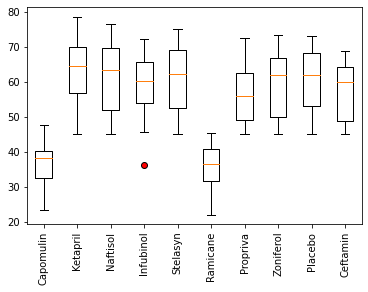

In [147]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels= treaments,flierprops=dict(markerfacecolor = "red"))
plt.tick_params(axis="x", labelrotation=90)
plt.show()

## Line and Scatter Plots

In [151]:
clean_df[clean_df["Mouse ID"] == "b128"].head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


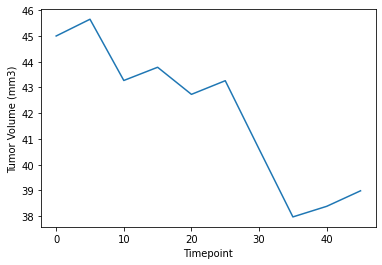

In [153]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse =clean_df[clean_df["Mouse ID"] == "b128"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

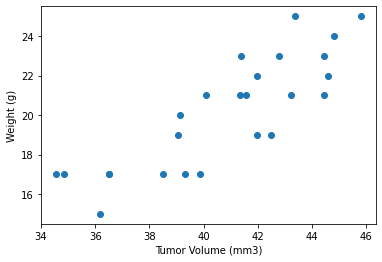

In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_reg = clean_df[clean_df["Drug Regimen"]== "Capomulin"].groupby("Mouse ID").mean()
plt.scatter(capo_reg["Tumor Volume (mm3)"], capo_reg["Weight (g)"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

In [183]:
capo_reg

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


## Correlation and Regression

Correlation Coefficient
0.8419363424694719
LinregressResult(slope=0.7426941826944182, intercept=-10.14886316411134, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.09924763572688554, intercept_stderr=4.057174696760879)


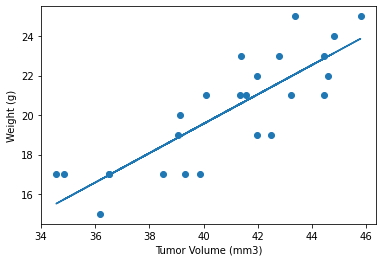

In [187]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print("Correlation Coefficient")
print(capo_reg[["Weight (g)","Tumor Volume (mm3)"]].corr()["Weight (g)"][1])
model = st.linregress(capo_reg["Tumor Volume (mm3)"], capo_reg["Weight (g)"])
print(model)
plt.scatter(capo_reg["Tumor Volume (mm3)"], capo_reg["Weight (g)"])
plt.plot(capo_reg["Tumor Volume (mm3)"], capo_reg["Tumor Volume (mm3)"]*model[0]+model[1])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()